In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from scipy.stats import zscore
from scipy.stats.mstats import winsorize

import warnings 

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

usedu_df = pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()

In [2]:
usedu_df.info()
usedu_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [3]:
# For easier programming we will convert all column heads to lowercase.
clean_usedu = usedu_df.copy()

clean_usedu.columns = clean_usedu.columns.str.lower()

print(clean_usedu.columns)
clean_usedu.head()



Index(['primary_key', 'state', 'year', 'enroll', 'total_revenue',
       'federal_revenue', 'state_revenue', 'local_revenue',
       'total_expenditure', 'instruction_expenditure',
       'support_services_expenditure', 'other_expenditure',
       'capital_outlay_expenditure', 'grades_pk_g', 'grades_kg_g',
       'grades_4_g', 'grades_8_g', 'grades_12_g', 'grades_1_8_g',
       'grades_9_12_g', 'grades_all_g', 'avg_math_4_score', 'avg_math_8_score',
       'avg_reading_4_score', 'avg_reading_8_score'],
      dtype='object')


,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
# We need to fill missing values before handling outliers.

fill_list = ['enroll', 'total_revenue', 'federal_revenue', 'state_revenue', 'local_revenue', 'total_expenditure', 
             'instruction_expenditure', 'support_services_expenditure', 'other_expenditure', 
             'capital_outlay_expenditure', 'grades_pk_g', 'grades_kg_g', 'grades_4_g', 'grades_8_g', 'grades_12_g', 
             'grades_1_8_g', 'grades_9_12_g', 'grades_all_g', 'avg_math_4_score', 'avg_math_8_score', 
             'avg_reading_4_score', 'avg_reading_8_score'] 

states = clean_usedu["state"].unique()

for state in states:
    clean_usedu.loc[clean_usedu["state"] == state, fill_list] = clean_usedu.loc[clean_usedu["state"] == state, fill_list].interpolate()
    
clean_usedu.dropna(inplace=True)

clean_usedu.info()
clean_usedu.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 54 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   primary_key                   1046 non-null   object 
 1   state                         1046 non-null   object 
 2   year                          1046 non-null   int64  
 3   enroll                        1046 non-null   float64
 4   total_revenue                 1046 non-null   float64
 5   federal_revenue               1046 non-null   float64
 6   state_revenue                 1046 non-null   float64
 7   local_revenue                 1046 non-null   float64
 8   total_expenditure             1046 non-null   float64
 9   instruction_expenditure       1046 non-null   float64
 10  support_services_expenditure  1046 non-null   float64
 11  other_expenditure             1046 non-null   float64
 12  capital_outlay_expenditure    1046 non-null   float64
 13  gr

,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,...,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score
54,1993_ARIZONA,ARIZONA,1993,676297.0,3427976.0,318465.0,1415407.0,1694104.0,3623946.0,1578889.0,...,57701.0,53500.0,37614.0,461398.0,182737.0,647299.0,215.834434,265.993417,206.291984,262.448330
55,1993_ARKANSAS,ARKANSAS,1993,311432.0,1346909.0,128196.0,771079.0,447634.0,1376067.0,782791.0,...,34255.0,36471.0,27169.0,280280.0,125801.0,407329.0,211.616130,257.647254,208.685273,266.423396
57,1993_COLORADO,COLORADO,1993,539538.0,3058326.0,147793.0,1242337.0,1668196.0,3028305.0,1537714.0,...,50807.0,47665.0,34770.0,403871.0,164260.0,575380.0,222.219036,273.200878,215.523979,266.856804
58,1993_CONNECTICUT,CONNECTICUT,1993,471918.0,4064158.0,149204.0,1433539.0,2481415.0,4079943.0,2302852.0,...,39093.0,34662.0,27979.0,310022.0,127655.0,443893.0,228.105503,275.202320,224.712775,264.457874
59,1993_DELAWARE,DELAWARE,1993,104355.0,683954.0,44497.0,443250.0,196207.0,694534.0,394680.0,...,8285.0,8265.0,5882.0,67899.0,28930.0,97394.0,217.181255,263.834857,207.792430,262.255809


# 1. Consider the two variables TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

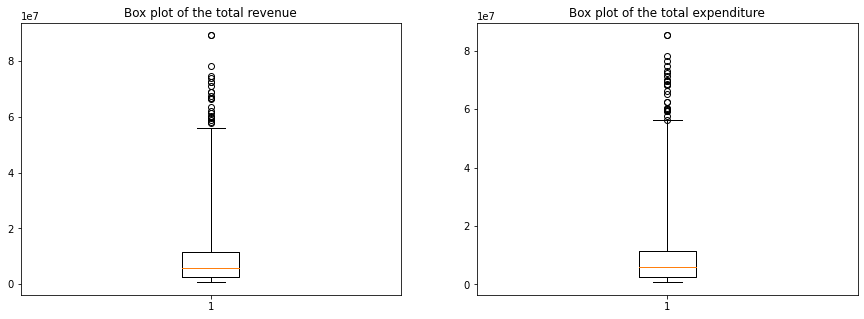

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(clean_usedu["total_revenue"], whis=5)
plt.title("Box plot of the total revenue")

plt.subplot(1,2,2)
plt.boxplot(clean_usedu["total_expenditure"], whis=5)
plt.title("Box plot of the total expenditure")

plt.show()

In [6]:
# Tukey's method to identify outliers.

rev_q75, rev_q25 = np.percentile(clean_usedu["total_revenue"], [75, 25])
rev_iqr = rev_q75 - rev_q25

exp_q75, exp_q25 = np.percentile(clean_usedu["total_expenditure"], [75, 25])
exp_iqr = exp_q75 - exp_q25

for threshold in np.arange(1, 5, 0.5):
    rev_min_val = rev_q25 - (rev_iqr*threshold)
    rev_max_val = rev_q75 + (rev_iqr*threshold)
    exp_min_val = exp_q25 - (exp_iqr*threshold)
    exp_max_val = exp_q75 + (exp_iqr*threshold)
    print("The score threshold is {}.".format(threshold))
    print("Number of total revenue outliers is {}.".format(len((np.where((clean_usedu["total_revenue"]>rev_max_val) | (clean_usedu["total_revenue"]<rev_min_val))[0]))))
    print("Number of total expenditure outliers is {}.".format(len((np.where((clean_usedu["total_expenditure"]>exp_max_val) | (clean_usedu["total_expenditure"]<exp_min_val))[0]))))


The score threshold is 1.0.
Number of total revenue outliers is 126.
Number of total expenditure outliers is 131.
The score threshold is 1.5.
Number of total revenue outliers is 95.
Number of total expenditure outliers is 100.
The score threshold is 2.0.
Number of total revenue outliers is 62.
Number of total expenditure outliers is 66.
The score threshold is 2.5.
Number of total revenue outliers is 51.
Number of total expenditure outliers is 51.
The score threshold is 3.0.
Number of total revenue outliers is 46.
Number of total expenditure outliers is 47.
The score threshold is 3.5.
Number of total revenue outliers is 42.
Number of total expenditure outliers is 44.
The score threshold is 4.0.
Number of total revenue outliers is 36.
Number of total expenditure outliers is 39.
The score threshold is 4.5.
Number of total revenue outliers is 30.
Number of total expenditure outliers is 34.


## Based on the box plots and the Tukey method, both variables have outlier values.

# 2. If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this lesson to eliminate them and validate that there are no outlier values after you handle them.

In [7]:
# We will winsorize the two columns.
winsorized_rev = winsorize(clean_usedu["total_revenue"], (0, 0.05))
winsorized_exp = winsorize(clean_usedu["total_expenditure"], (0, 0.05))

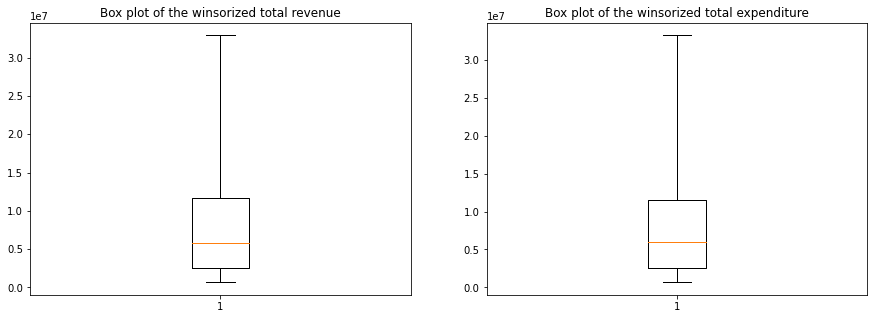

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.boxplot(winsorized_rev, whis=5)
plt.title("Box plot of the winsorized total revenue")

plt.subplot(1,2,2)
plt.boxplot(winsorized_exp, whis=5)
plt.title("Box plot of the winsorized total expenditure")

plt.show()

# 3. Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique that think is most suitable.

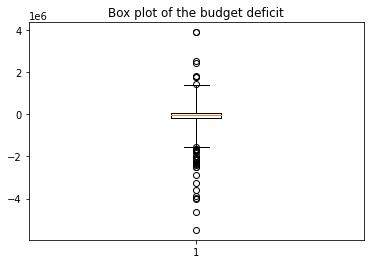

In [9]:
clean_usedu["budget_deficit"] = clean_usedu["total_revenue"] - clean_usedu["total_expenditure"]

plt.boxplot(clean_usedu["budget_deficit"], whis=5)
plt.title("Box plot of the budget deficit")
plt.show()

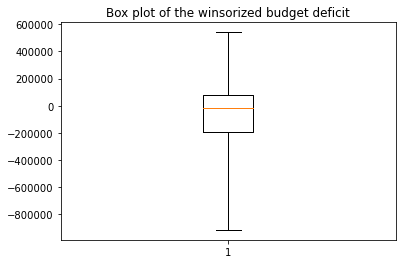

In [10]:
# We see outliers in both ends, so we will use the two-way winsorization.
winsorized_def = winsorize(clean_usedu["budget_deficit"], (0.05, 0.05))

plt.boxplot(winsorized_def, whis=5)
plt.title("Box plot of the winsorized budget deficit")
plt.show()

# 4. Now create another variable by subtracting TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

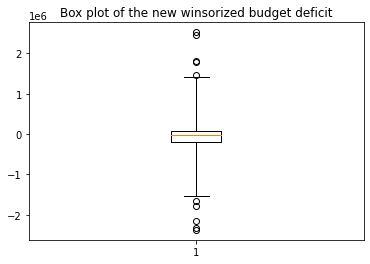

In [11]:
wins_def_2 = winsorized_rev - winsorized_exp

plt.boxplot(wins_def_2, whis=5)
plt.title("Box plot of the new winsorized budget deficit")
plt.show()

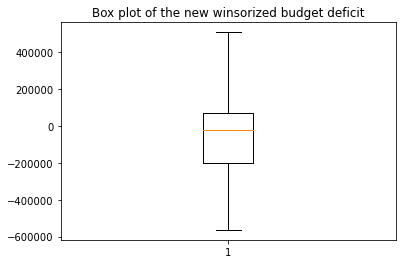

In [12]:
# We still see outliers, so we will use the winsorization again.

new_wins_def = winsorize(wins_def_2, (0.05, 0.05))

plt.boxplot(new_wins_def, whis=5)
plt.title("Box plot of the new winsorized budget deficit")
plt.show()

# 5. Compare some basic descriptive statistics of the budget variables you end up with in the third and the fourth questions. Do you see any differences?

In [13]:
pd.options.display.float_format = "{:,.2f}".format
pd.DataFrame({"original_budget": clean_usedu["budget_deficit"], "winsorized_budget 1": winsorized_def, "winsorized_budget 2": new_wins_def}).describe()

,original_budget,winsorized_budget 1,winsorized_budget 2
count,"1,046.00","1,046.00","1,046.00"
mean,"-89,716.28","-67,121.22","-42,953.40"
std,"606,522.98","324,443.53","251,843.51"
min,"-5,487,742.00","-913,765.00","-563,852.00"
25%,"-194,945.00","-194,945.00","-202,135.25"
50%,"-15,834.00","-15,834.00","-20,112.50"
75%,"77,363.50","77,363.50","72,142.00"
max,"3,897,129.00","540,772.00","508,361.00"


## For all critical statistics the two variables differ significantly. 

# 6. If your variable of interest is the budget deficit variable, which method do you think is the most appropriate in dealing with the outliers in this variable: the method in the third question or the one in the fourth question?

## Sometimes, differencing may help us to eliminate the outliers. So, it's better to first create a variable from the originals and then to apply outlier elimination techniques next. Hence, the approach in the third question is more desirable in most of the cases.